In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np 
from datetime import datetime

import yfinance as yf
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource

import sambo
import backtesting
from backtesting import Backtest, Strategy
from backtesting.lib import crossover, SignalStrategy

from backtesting.test import SMA, GOOG

# backtesting.set_bokeh_output(notebook=True)
            
import itertools 
import logging
logger = logging.getLogger('yfinance')
logger.disabled = True

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14660\1650128870.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
d:\Binance Tradebot\.venv\Lib\site-packages\backtesting\_plotting.py:53: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [3]:
from utils.loader import *
from utils.signals import *
from utils.trade import *
from utils.strategy import *

In [4]:
# now = datetime.today().strftime('%Y-%m-%d')

loader = DataLoader(ticker='AAPL', start='2020-06-01', end='2024-12-31', freq='1d', test_size=0.1)
loader.run()
# test     

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
strategy = testRSI
bt = BackTrader(data=loader.data)

params = {
    'short_duration': 5,
    'long_duration': 10,
    'atr_multiplier': 3
}
bt.evaluate(data=bt.train_data, strategy=strategy, params=params, plot=True, order_size=0.999)
bt.trades.head()

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,SL,TP,PnL,ReturnPct,EntryTime,...,"Entry_EMA(C,10)","Exit_EMA(C,10)",Entry_ATR,Exit_ATR,"Entry_previous_…(L,5)","Exit_previous_…(L,5)","Entry_previous_…(H,5)","Exit_previous_…(H,5)",Entry_RSI(C),Exit_RSI(C)
0,-110,37,42,90.370094,100.142463,101.494382,63.259066,-1074.960564,-0.108137,2020-07-23,...,93.136289,92.514621,2.445697,2.622812,89.557353,86.768728,96.604368,93.730579,55.149403,50.707011
1,94,42,58,93.625946,121.713730,106.561237,121.713730,2640.251678,0.300000,2020-07-30,...,92.514621,112.813122,2.622812,3.008161,86.768728,111.124689,93.730579,121.758165,50.707011,77.603928
2,-104,69,84,110.010635,110.956482,124.945662,77.007445,-98.368036,-0.008598,2020-09-08,...,119.328037,109.619931,5.651223,4.565554,108.128700,102.385373,134.544127,112.448395,46.995022,45.505118
3,101,84,100,111.249001,114.525348,103.042172,144.623701,330.911128,0.029451,2020-09-29,...,109.619931,114.886224,4.565554,3.639207,102.385373,112.750664,112.448395,118.523258,45.505118,50.121857
4,-101,100,111,113.959793,115.572731,128.032563,79.771855,-162.906769,-0.014154,2020-10-21,...,114.886224,111.421228,3.639207,3.988848,112.750664,104.647603,118.523258,116.641329,50.121857,50.014336


In [15]:
strategy = Modified_EMACross
bt = BackTrader(data=loader.data)

params = {
    'short_duration': 5,
    'long_duration': 10,
    'atr_multiplier': 3
}
bt.evaluate(data=bt.train_data, strategy=strategy, params=params, plot=True, order_size=0.999)
bt.trades.head()

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,SL,TP,PnL,ReturnPct,EntryTime,...,"Entry_EMA(C,5)","Exit_EMA(C,5)","Entry_EMA(C,10)","Exit_EMA(C,10)",Entry_ATR,Exit_ATR,"Entry_previous_…(L,5)","Exit_previous_…(L,5)","Entry_previous_…(H,5)","Exit_previous_…(H,5)"
0,-110,37,42,90.370094,100.142463,101.494382,63.259066,-1074.960564,-0.108137,2020-07-23,...,93.135835,92.527298,93.136289,92.514621,2.445697,2.622812,89.557353,86.768728,96.604368,93.730579
1,94,42,58,93.625946,121.713730,106.561237,121.713730,2640.251678,0.300000,2020-07-30,...,92.527298,115.798314,92.514621,112.813122,2.622812,3.008161,86.768728,111.124689,93.730579,121.758165
2,-104,69,84,110.010635,110.956482,124.945662,77.007445,-98.368036,-0.008598,2020-09-08,...,117.783486,109.774403,119.328037,109.619931,5.651223,4.565554,108.128700,102.385373,134.544127,112.448395
3,101,84,100,111.249001,114.525348,103.042172,144.623701,330.911128,0.029451,2020-09-29,...,109.774403,114.818934,109.619931,114.886224,4.565554,3.639207,102.385373,112.750664,112.448395,118.523258
4,-101,100,111,113.959793,115.572731,128.032563,79.771855,-162.906769,-0.014154,2020-10-21,...,114.818934,111.754393,114.886224,111.421228,3.639207,3.988848,112.750664,104.647603,118.523258,116.641329


In [6]:
grid_search = {
    'short_duration': range(2, 10),
    'long_duration': range(5, 20),
    'atr_multiplier': np.arange(0.5, 3, 0.1)
}

bt.cross_val(strategy=strategy, train_size=160, test_size=80, step_size=40, order_size=0.999, commission=0.002, grid=grid_search)

{'short_duration': 5, 'long_duration': 6, 'atr_multiplier': 0.7356655322536966}
10662.34120272059
{'short_duration': 4, 'long_duration': 7, 'atr_multiplier': 0.7649003387943323}
11191.218715640425
{'short_duration': 4, 'long_duration': 19, 'atr_multiplier': 0.7730956216168723}
11281.655516390516
{'short_duration': 4, 'long_duration': 19, 'atr_multiplier': 0.5}
9501.715203038906
{'short_duration': 6, 'long_duration': 16, 'atr_multiplier': 2.8926877087112866}
12193.234409732104
{'short_duration': 3, 'long_duration': 15, 'atr_multiplier': 2.8999999999999995}
9227.556320882924
{'short_duration': 3, 'long_duration': 14, 'atr_multiplier': 2.8607607636327845}
10086.252029670588
{'short_duration': 4, 'long_duration': 12, 'atr_multiplier': 0.9463920110356248}
10362.500393708855
{'short_duration': 2, 'long_duration': 12, 'atr_multiplier': 1.1115277083811965}
10227.425839556197
{'short_duration': 6, 'long_duration': 13, 'atr_multiplier': 1.3458829846333638}
10029.56635135955
{'short_duration': 7,

10301.43464472329

In [7]:
loader.data

{'price_data':                  Close        High         Low        Open     Volume
 Date                                                                 
 2020-06-01   78.317688   78.439356   77.188605   77.320009   80791200
 2020-06-02   78.680252   78.704587   77.607140   78.050013   87642800
 2020-06-03   79.113388   79.376195   78.427179   79.001456  104491200
 2020-06-04   78.432060   79.235066   78.057321   78.935768   87560400
 2020-06-05   80.665878   80.726712   78.653492   78.682692  137250400
 ...                ...         ...         ...         ...        ...
 2024-12-23  254.989655  255.369227  253.171646  254.490204   40858800
 2024-12-24  257.916443  257.926411  255.009620  255.209412   23234700
 2024-12-26  258.735504  259.814335  257.347047  257.906429   27237100
 2024-12-27  255.309296  258.415896  252.782075  257.546826   42355300
 2024-12-30  251.923019  253.221595  250.474615  251.952985   35557500
 
 [1154 rows x 5 columns],
 'train_data':                  Clo

In [8]:
df = loader.data['price_data']
df.index = pd.to_datetime(df.index)

In [9]:
df["atr"] = ATR(df, 14)

In [10]:
df["atr"]

Date
2020-06-01         NaN
2020-06-02         NaN
2020-06-03         NaN
2020-06-04         NaN
2020-06-05         NaN
                ...   
2024-12-23    4.107628
2024-12-24    4.113335
2024-12-26    4.117617
2024-12-27    4.360919
2024-12-30    4.314541
Name: atr, Length: 1154, dtype: float64

In [11]:
df.head()

,Close,High,Low,Open,Volume,atr
Date,,,,,,
2020-06-01,78.317688,78.439356,77.188605,77.320009,80791200,NaN
2020-06-02,78.680252,78.704587,77.607140,78.050013,87642800,NaN
2020-06-03,79.113388,79.376195,78.427179,79.001456,104491200,NaN
2020-06-04,78.432060,79.235066,78.057321,78.935768,87560400,NaN
2020-06-05,80.665878,80.726712,78.653492,78.682692,137250400,NaN


In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.signal import savgol_filter, find_peaks
from IPython import display
from IPython.display import HTML

pd.set_option('mode.chained_assignment', None)

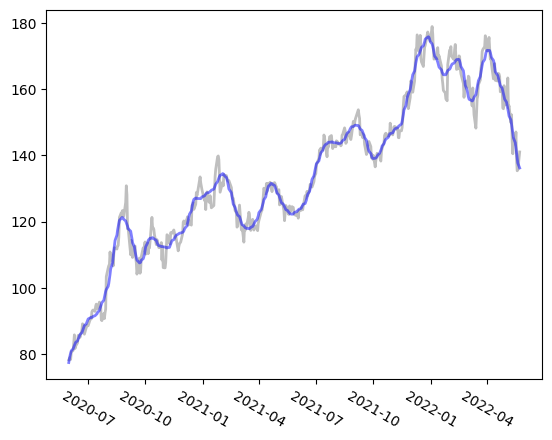

In [13]:
df2 = df.iloc[0:500]

df2["close_smooth"] = savgol_filter(df2.Close, 49, 5)

fig, ax = plt.subplots()
plt.xticks(rotation=-30)

price, = ax.plot(df2.index, df2.Close, color='grey', linewidth=2, alpha=0.5, zorder=5)
price_smooth = ax.plot(df2.index, df2.close_smooth, color='blue', linewidth=2, alpha=0.5, zorder=5)
plt.show()


ValueError: ('Lengths must match to compare', (499,), (11,))

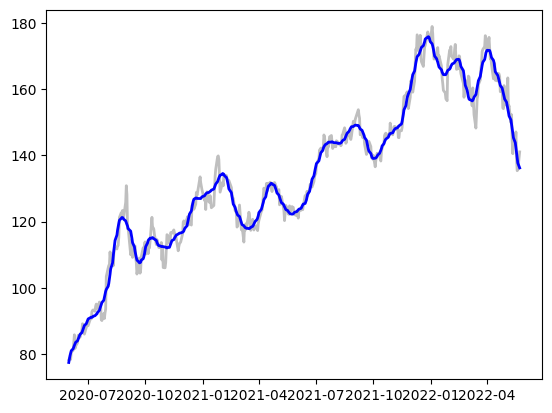

In [14]:
fig, ax = plt.subplots()

# Plot the raw close price
price, = ax.plot(df2.index, df2.Close, color='grey', linewidth=2, alpha=0.5, zorder=5)

# Plot the smoothed close price
smooth, = ax.plot(df2.index, df2.close_smooth, color='blue', linewidth=2, zorder=5)

# Assume df2 has a column 'atr' and the first row(s) might be NaN
atr = df2.atr.iloc[1:]  # all the first ATRs are NaN, so skip them

# Identify peaks (local maxima)
peaks_idx, _ = find_peaks(df2.close_smooth, distance=15, prominence=atr)

# Identify troughs (local minima) by looking for peaks in the inverted data
troughs_idx, _ = find_peaks(-df2.close_smooth, distance=15, prominence=atr)

# Mark the peaks with red circles
ax.plot(
    df2.index[peaks_idx],
    df2.close_smooth.iloc[peaks_idx],
    linestyle='None',
    marker='o',
    markersize=10,
    color='red',
    zorder=10
)

# Mark the troughs with green circles
ax.plot(
    df2.index[troughs_idx],
    df2.close_smooth.iloc[troughs_idx],
    linestyle='None',
    marker='o',
    markersize=10,
    color='green',
    zorder=10
)

plt.show()


In [ ]:
df["atr"].isna().sum()

np.int64(13)